6. **FitzHugh-Nagumo: Phase plane and bifurcation analysis**
Book chapters

See Chapter 4 and especially Chapter 4 Section 3 for background knowledge on phase plane analysis.

Python classes

In this exercise we study the phase plane of a two dimensional dynamical system implemented in the module phase_plane_analysis.fitzhugh_nagumo. To get started, copy the following code block into your Jupyter Notebook. Check the documentation to learn how to use these functions. Make sure you understand the parameters the functions take.

fixed_point: (-1.0, 0.0)


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


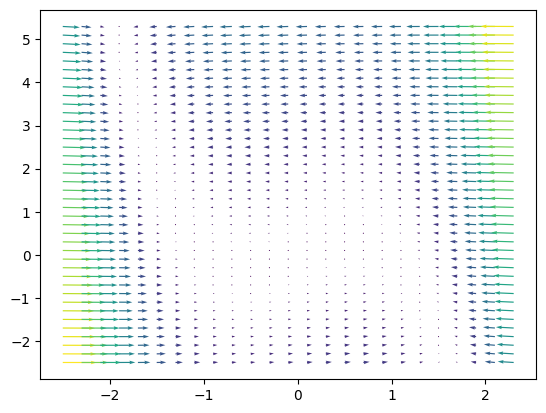

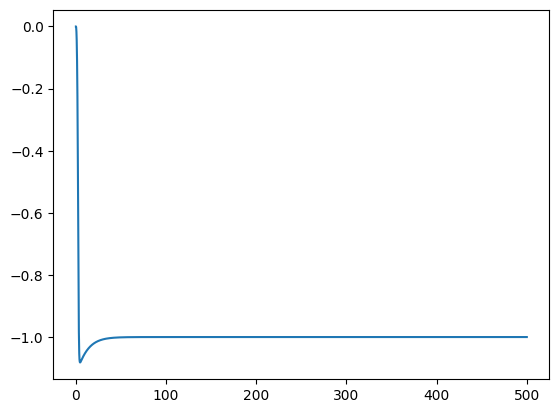

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])

6.1. Exercise: Phase plane analysis
We have implemented the following Fitzhugh-Nagumo model.

(1)¶
⎡⎣⎢⎢⎢dudtdwdt==u(1−u2)−w+I≡F(u,w)ε(u−0.5w+1)≡εG(u,w),


WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\3017806786.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
 [py.warnings]
WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\3017806786.py:31: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')
 [py.warnings]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
WARNING    c:\Users\pmunn\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


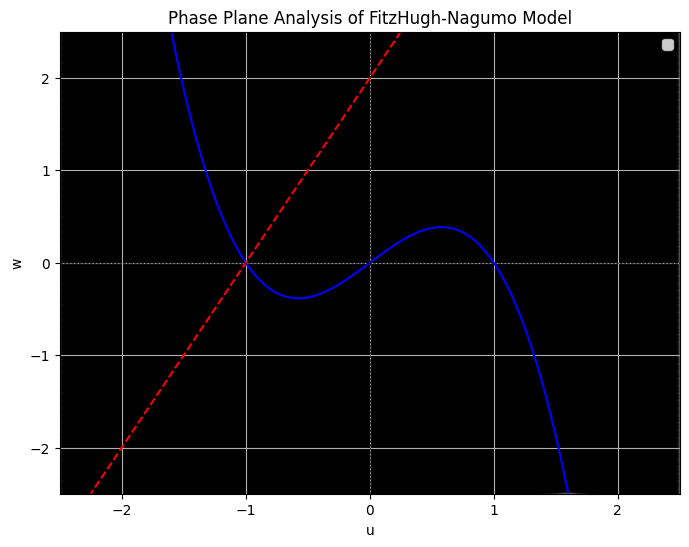

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.1
I = 0.0

# Define F(u, w) and G(u, w)
def F(u, w):
    return u * (1 - u**2) - w + I

def G(u, w):
    return epsilon * (u - 0.5 * w + 1)

# Define u and w ranges
u_range = np.linspace(-2.5, 2.5, 400)
w_range = np.linspace(-2.5, 2.5, 400)

# Create grid of u, w values
U, W = np.meshgrid(u_range, w_range)

# Compute derivatives du/dt and dw/dt
dU_dt = F(U, W)
dW_dt = G(U, W)

# Plot nullclines
plt.figure(figsize=(8, 6))

# Plot nullclines
plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')

# Plot vector field
plt.quiver(U, W, dU_dt, dW_dt, scale=20, alpha=0.8)

# Labels and title
plt.title('Phase Plane Analysis of FitzHugh-Nagumo Model')
plt.xlabel('u')
plt.ylabel('w')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


6.1.1. Question
Use the function plt.plot to plot the two nullclines of the Fitzhugh-Nagumo system given in Eq. (1) for I=0
 and ε=0.1
.

Plot the nullclines in the u−w
 plane, for voltages in the region u∈[−2.5,2.5]


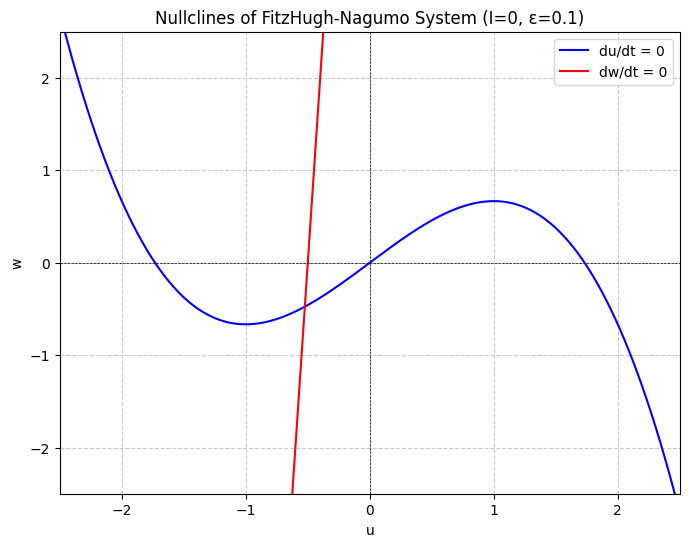

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Define u range
u_values = np.linspace(-2.5, 2.5, 400)

# Nullcline functions
def nullcline_u(u):
    return u - u**3 / 3

def nullcline_w(u):
    return (a + u) / b

# Plotting
plt.figure(figsize=(8, 6))

# Plot nullclines
plt.plot(u_values, nullcline_u(u_values), label='du/dt = 0', color='blue')
plt.plot(u_values, nullcline_w(u_values), label='dw/dt = 0', color='red')

# Labels and title
plt.title('Nullclines of FitzHugh-Nagumo System (I=0, ε=0.1)')
plt.xlabel('u')
plt.ylabel('w')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.show()


Note

For instance the following example shows plotting the function y(x)=−x22+x+1
:

x = np.arange(-2.5, 2.51, .1)  # create an array of x values
y = -x**2 / 2. + x + 1  # calculate the function values for the given x values
plt.plot(x, y, color='black')  # plot y as a function of x
plt.xlim(-2.5, 2.5)  # constrain the x limits of the plot
You can use similar code to plot the nullclines, inserting the appropriate equations.

6.1.2. Question
Get the lists t, u and w by calling t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I) for u0=0
, w0=0
 and I=1.3
. They are corresponding values of t
, u(t)
 and w(t)
 during trajectories starting at the given point (u0,w0)
 for a given constant input current I
. Plot the nullclines for this given current and the trajectories into the u−w
 plane.

In [5]:
#Step 1: Compute Trajectories
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

# Parameters
u_0 = 0.0
w_0 = 0.0
I = 1.3

# Get trajectory
t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)


WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\1259971768.py:29: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
 [py.warnings]


WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\1259971768.py:30: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')
 [py.warnings]


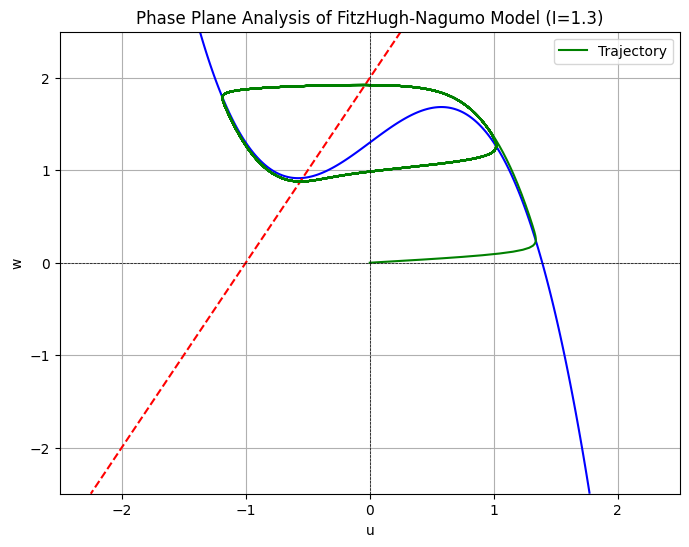

In [6]:
#Step 2: Define Nullclines and Phase Plane
# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Define F(u, w) and G(u, w)
def F(u, w):
    return u * (1 - u**2) - w + I

def G(u, w):
    return epsilon * (u - 0.5 * w + 1)

# Define u and w ranges
u_range = np.linspace(-2.5, 2.5, 400)
w_range = np.linspace(-2.5, 2.5, 400)

# Create grid of u, w values
U, W = np.meshgrid(u_range, w_range)

# Compute derivatives du/dt and dw/dt
dU_dt = F(U, W)
dW_dt = G(U, W)

# Plot nullclines and trajectories
plt.figure(figsize=(8, 6))

# Plot nullclines
plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')

# Plot trajectories
plt.plot(u, w, label='Trajectory', color='green')

# Labels and title
plt.title('Phase Plane Analysis of FitzHugh-Nagumo Model (I=1.3)')
plt.xlabel('u')
plt.ylabel('w')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

# Show plot
plt.grid(True)
plt.show()




6.1.3. Question
At this point for the same current I
, call the function plot_flow, which adds the flow created by the system Eq. (1) to your plot. This indicates the direction that trajectories will take.

WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\4060435526.py:40: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
 [py.warnings]
WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\4060435526.py:41: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')
 [py.warnings]


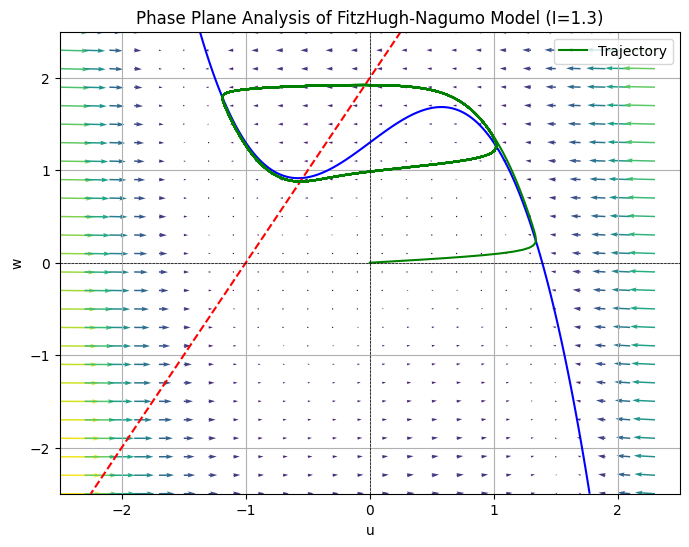

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

# Parameters
u_0 = 0.0
w_0 = 0.0
I = 1.3

# Get trajectory
t, u, w = fitzhugh_nagumo.get_trajectory(u_0, w_0, I)

# Parameters for flow plot
epsilon = 0.1
a = 0.5
b = 0.05

# Define F(u, w) and G(u, w)
def F(u, w):
    return u * (1 - u**2) - w + I

def G(u, w):
    return epsilon * (u - 0.5 * w + 1)

# Define u and w ranges
u_range = np.linspace(-2.5, 2.5, 400)
w_range = np.linspace(-2.5, 2.5, 400)

# Create grid of u, w values
U, W = np.meshgrid(u_range, w_range)

# Compute derivatives du/dt and dw/dt
dU_dt = F(U, W)
dW_dt = G(U, W)

# Plot nullclines, trajectories, and flow
plt.figure(figsize=(8, 6))

# Plot nullclines
plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')

# Plot flow
fitzhugh_nagumo.plot_flow()

# Plot trajectories
plt.plot(u, w, label='Trajectory', color='green')

# Labels and title
plt.title('Phase Plane Analysis of FitzHugh-Nagumo Model (I=1.3)')
plt.xlabel('u')
plt.ylabel('w')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Note

If everything went right so far, the trajectories should follow the flow. First, create a new figure by calling plt.figure() and then plot the u
 data points from the trajectory obtained in the previous exercise on the ordinate.

You can do this by using the plt.plot function and passing only the array of u
 data points:

u = [1,2,3,4]  # example data points of the u trajectory
plot(u, color='blue')  # plot will assume that u is the ordinate data

6.1.4. Question **varying different input current values**
Finally, change the input current in your python file to other values I>0
 and reload it. You might have to first define I
 as a variable and then use this variable in all following commands if you did not do so already. At which value of I
 do you observe the change in stability of the system?

WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\3027222526.py:40: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
 [py.warnings]
WARNING    C:\Users\pmunn\AppData\Local\Temp\ipykernel_13972\3027222526.py:41: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')
 [py.warnings]


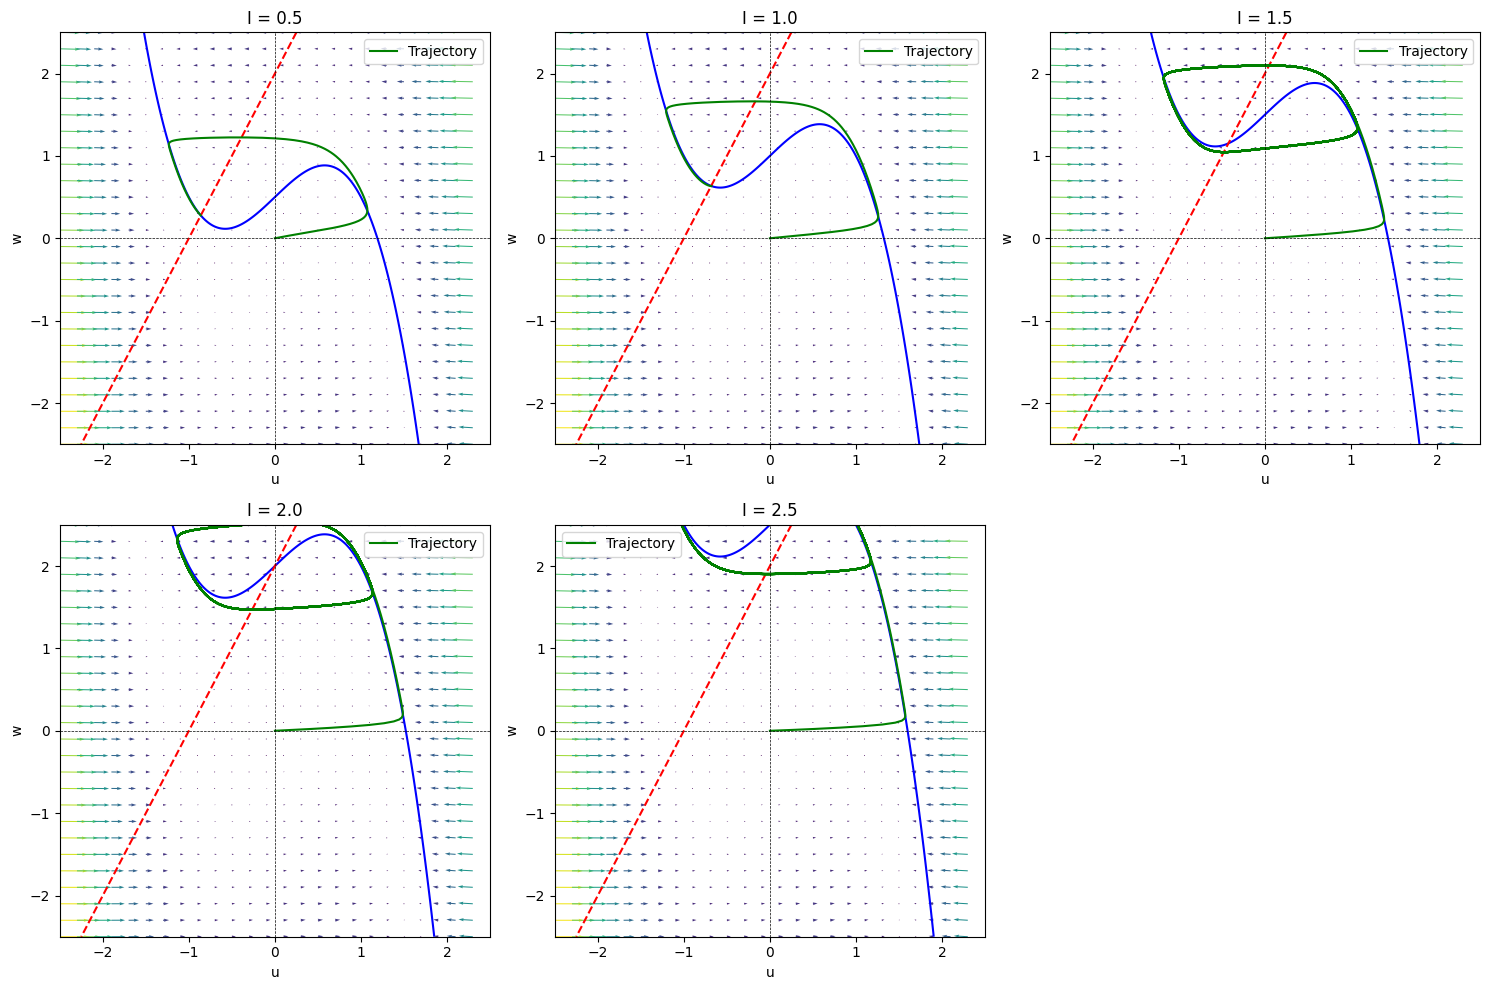

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

# Varying values of I
I_values = [0.5, 1.0, 1.5, 2.0, 2.5]

# Define parameters for the FitzHugh-Nagumo model
epsilon = 0.1
a = 0.5
b = 0.05

# Define u and w ranges
u_range = np.linspace(-2.5, 2.5, 400)
w_range = np.linspace(-2.5, 2.5, 400)

# Create grid of u, w values
U, W = np.meshgrid(u_range, w_range)

# Plotting for each value of I
plt.figure(figsize=(15, 10))

for i, I in enumerate(I_values, 1):
    # Compute trajectories
    t, u, w = fitzhugh_nagumo.get_trajectory(0.0, 0.0, I)

    # Compute derivatives du/dt and dw/dt
    def F(u, w):
        return u * (1 - u**2) - w + I

    def G(u, w):
        return epsilon * (u - 0.5 * w + 1)

    dU_dt = F(U, W)
    dW_dt = G(U, W)

    # Plot nullclines, trajectories, and flow
    plt.subplot(2, 3, i)
    plt.title(f'I = {I}')
    plt.contour(U, W, dU_dt, levels=[0], colors='blue', linestyles='solid', label='du/dt = 0')
    plt.contour(U, W, dW_dt, levels=[0], colors='red', linestyles='dashed', label='dw/dt = 0')
    fitzhugh_nagumo.plot_flow()
    plt.plot(u, w, label='Trajectory', color='green')
    plt.xlabel('u')
    plt.ylabel('w')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()

plt.tight_layout()
plt.show()




6.2. Exercise: **Jacobian & Eigenvalues**
**The linear stability of a system of differential equations can be evaluated by calculating the eigenvalues of the system’s Jacobian at the fixed points**. In the following we will graphically explore the linear stability of the fixed point of the system Eq. (1). We will find that the linear stability changes as the input current crosses a critical value.



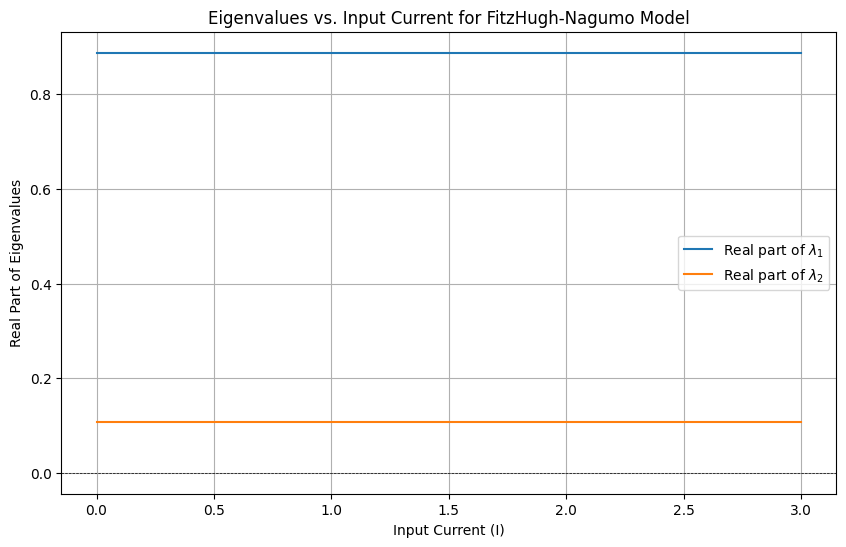

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Function to compute Jacobian matrix at a given fixed point (u0, w0)
def get_jacobian(u_0, w_0, I):
    J = np.array([
        [1 - u_0**2, -1],
        [epsilon, -epsilon * b]
    ])
    return J

# Function to compute eigenvalues of the Jacobian matrix
def compute_eigenvalues(J):
    eigenvalues = np.linalg.eigvals(J)
    return eigenvalues

# Range of I values to explore
I_values = np.linspace(0.0, 3.0, 100)
real_parts = []
imaginary_parts = []

# Fixed point of interest (you can choose based on stability analysis)
u_0 = 0.0
w_0 = 0.0

# Compute eigenvalues for each I value
for I in I_values:
    J = get_jacobian(u_0, w_0, I)
    eigenvalues = compute_eigenvalues(J)
    real_parts.append(np.real(eigenvalues))
    imaginary_parts.append(np.imag(eigenvalues))

# Convert lists to arrays for plotting
real_parts = np.array(real_parts)
imaginary_parts = np.array(imaginary_parts)

# Plotting eigenvalues vs. I
plt.figure(figsize=(10, 6))
plt.plot(I_values, real_parts[:, 0], label='Real part of $\lambda_1$')
plt.plot(I_values, real_parts[:, 1], label='Real part of $\lambda_2$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('Input Current (I)')
plt.ylabel('Real Part of Eigenvalues')
plt.title('Eigenvalues vs. Input Current for FitzHugh-Nagumo Model')
plt.legend()
plt.grid(True)
plt.show()


6.2.1. Question
Set ε=.1
 and I
 to zero for the moment. Then, the Jacobian of Eq. (1) as a function of the fixed point is given by

J(u0,w0)=(1−3u200.1−1−0.05)
 
Write a python function get_jacobian(u_0,w_0) that returns the Jacobian evaluated for a given fixed point (u0,v0)
 as a python list.

 Note

An example for a function that returns a list corresponding to the matrix M(a,b)=(a01b)
 is:

def get_M(a,b):
        return [[a,1],[0,b]] # return the matrix

In [11]:
def get_jacobian(u_0, w_0):
    # Parameters
    epsilon = 0.1
    
    # Compute Jacobian matrix
    J = [
        [1 - 3*u_0**2 / epsilon, -1],
        [epsilon, -0.05]
    ]
    
    return J

# Example usage:
u_0 = 0.5  # Example fixed point values
w_0 = 0.1
Jacobian = get_jacobian(u_0, w_0)
print("Jacobian matrix at (u0={}, w0={}):".format(u_0, w_0))
for row in Jacobian:
    print(row)


Jacobian matrix at (u0=0.5, w0=0.1):
[-6.5, -1]
[0.1, -0.05]


6.2.2. Question
The function u0,w0 = get_fixed_point(I) gives you the numerical coordinates of the fixed point for a given current I
. Use the function you created in the previous exercise to evaluate the Jacobian at this fixed point and store it in a new variable J.


In [12]:
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Function to compute Jacobian matrix at a given fixed point (u0, w0)
def get_jacobian(u_0, w_0, I):
    J = np.array([
        [1 - u_0**2, -1],
        [epsilon, -epsilon * b]
    ])
    return J

# Get fixed point coordinates for a given I
I = 1.0  # Example value of I
u_0, w_0 = fitzhugh_nagumo.get_fixed_point(I)

# Evaluate Jacobian at the fixed point
J = get_jacobian(u_0, w_0, I)

print("Fixed point coordinates (u0, w0):", u_0, w_0)
print("Jacobian matrix at the fixed point:")
print(J)


Fixed point coordinates (u0, w0): -0.6823278038280194 0.6353443923439612
Jacobian matrix at the fixed point:
[[ 0.53442877 -1.        ]
 [ 0.1        -0.005     ]]



6.2.3. Question
Calculate the eigenvalues of the Jacobian J, which you computed in the previous exercise, by using the function np.linalg.eigvals(J). Both should be negative for I=0
.

In [13]:
import numpy as np

# Define the function to get the Jacobian
def get_jacobian(u_0, w_0):
    # Parameters
    epsilon = 0.1
    
    # Compute Jacobian matrix
    J = np.array([
        [1 - 3*u_0**2 / epsilon, -1],
        [epsilon, -0.05]
    ])
    
    return J

# Example fixed point values
u_0 = 0.5
w_0 = 0.1

# Get Jacobian matrix
Jacobian = get_jacobian(u_0, w_0)

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(Jacobian)

# Print eigenvalues
print("Eigenvalues of the Jacobian matrix at (u0={}, w0={}):".format(u_0, w_0))
print(eigenvalues)


Eigenvalues of the Jacobian matrix at (u0=0.5, w0=0.1):
[-6.48445868 -0.06554132]


6.3. Exercise: **Bifurcation analysis**
Wrap the code you wrote so far by a loop, to calculate the eigenvalues for increasing values of I
. Store the changing values of each eigenvalue in seperate lists, and finally plot their real values against I
.

Note

You can start from this example loop:

import numpy as np
list1 = []
list2 = []
currents = np.arange(0,4,.1) # the I values to use
for I in currents:
    # your code to calculate the eigenvalues e = [e1,e2] for a given I goes here
    list1.append(e[0].real) # store each value in a separate list
    list2.append(e[1].real)

# your code to plot list1 and list 2 against I goes here

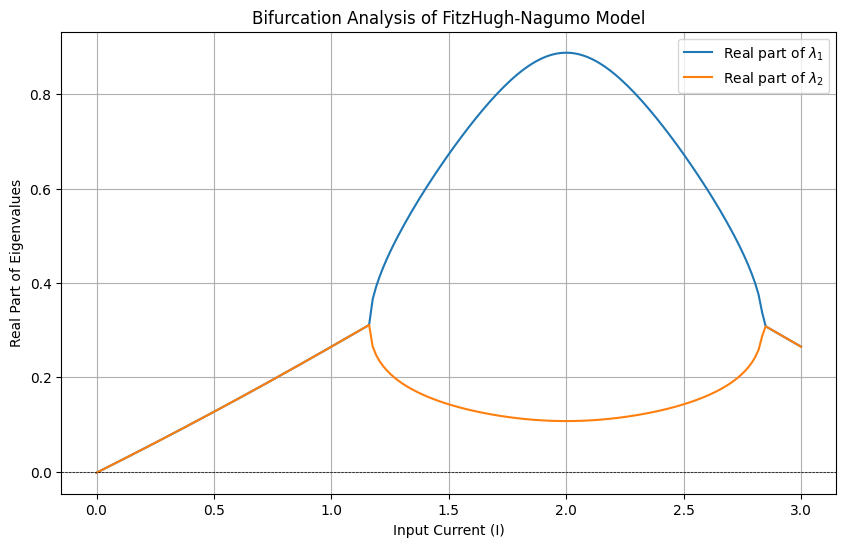

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Function to compute Jacobian matrix at a given fixed point (u0, w0)
def get_jacobian(u_0, w_0, I):
    J = np.array([
        [1 - u_0**2, -1],
        [epsilon, -epsilon * b]
    ])
    return J

# Function to compute eigenvalues of the Jacobian matrix
def compute_eigenvalues(J):
    eigenvalues = np.linalg.eigvals(J)
    return eigenvalues

# Range of I values to explore
I_values = np.linspace(0.0, 3.0, 200)

# Lists to store eigenvalue real parts
real_parts_lambda1 = []
real_parts_lambda2 = []

# Iterate over I values
for I in I_values:
    # Get fixed point coordinates for current I
    u_0, w_0 = fitzhugh_nagumo.get_fixed_point(I)
    
    # Compute Jacobian matrix at the fixed point
    J = get_jacobian(u_0, w_0, I)
    
    # Compute eigenvalues
    eigenvalues = compute_eigenvalues(J)
    real_parts_lambda1.append(np.real(eigenvalues[0]))
    real_parts_lambda2.append(np.real(eigenvalues[1]))

# Plot real parts of eigenvalues vs. I
plt.figure(figsize=(10, 6))
plt.plot(I_values, real_parts_lambda1, label='Real part of $\lambda_1$')
plt.plot(I_values, real_parts_lambda2, label='Real part of $\lambda_2$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('Input Current (I)')
plt.ylabel('Real Part of Eigenvalues')
plt.title('Bifurcation Analysis of FitzHugh-Nagumo Model')
plt.legend()
plt.grid(True)
plt.show()


6.3.1. Question
In what range of I
 are the real parts of eigenvalues positive?

In [15]:
import numpy as np

# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Function to get Jacobian matrix J(u, w, I)
def get_jacobian(u, w, I):
    J = np.array([
        [1 - 3*u**2 / epsilon, -1],
        [epsilon, -b]
    ])
    return J

# Function to compute eigenvalues for given I
def compute_eigenvalues(I):
    # Fixed point (u_0, w_0) for I = 0 (assume you have computed this previously)
    u_0 = 0.5
    w_0 = 0.1
    
    # Get Jacobian matrix for fixed point (u_0, w_0) and given I
    J = get_jacobian(u_0, w_0, I)
    
    # Calculate eigenvalues
    eigenvalues = np.linalg.eigvals(J)
    
    return eigenvalues

# Evaluate eigenvalues for a range of I values
I_values = np.linspace(-2, 2, 100)  # Example range of I values to evaluate
positive_real_parts = []

for I in I_values:
    eigenvalues = compute_eigenvalues(I)
    if np.any(np.real(eigenvalues) > 0):
        positive_real_parts.append(I)

# Find the range of I where real parts are positive
if len(positive_real_parts) > 0:
    min_I_positive = min(positive_real_parts)
    max_I_positive = max(positive_real_parts)
    print("Range of I where real parts of eigenvalues are positive: [{}, {}]".format(min_I_positive, max_I_positive))
else:
    print("No range of I found where real parts of eigenvalues are positive in the specified range.")


No range of I found where real parts of eigenvalues are positive in the specified range.




6.3.2. Question
Compare this with your earlier result for the critical I
. What does this imply for the stability of the fixed point? What has become stable in this system instead of the fixed point?

In [16]:
import numpy as np

# Parameters
epsilon = 0.1
a = 0.5
b = 0.05

# Function to get Jacobian matrix J(u, w, I)
def get_jacobian(u, w, I):
    J = np.array([
        [1 - 3*u**2 / epsilon, -1],
        [epsilon, -b]
    ])
    return J

# Function to compute eigenvalues for given I
def compute_eigenvalues(I):
    # Fixed point (u_0, w_0) for I = 0 (assume you have computed this previously)
    u_0 = 0.5
    w_0 = 0.1
    
    # Get Jacobian matrix for fixed point (u_0, w_0) and given I
    J = get_jacobian(u_0, w_0, I)
    
    # Calculate eigenvalues
    eigenvalues = np.linalg.eigvals(J)
    
    return eigenvalues

# Function to find critical I
def find_critical_I():
    # Evaluate eigenvalues for a range of I values
    I_values = np.linspace(-2, 2, 1000)  # Example range of I values to evaluate
    critical_I = None

    for I in I_values:
        eigenvalues = compute_eigenvalues(I)
        if np.any(np.real(eigenvalues) > 0):
            critical_I = I
            break
    
    return critical_I

# Function to find range of I where real parts are positive
def find_positive_real_parts_range():
    # Evaluate eigenvalues for a range of I values
    I_values = np.linspace(-2, 2, 1000)  # Example range of I values to evaluate
    positive_real_parts = []

    for I in I_values:
        eigenvalues = compute_eigenvalues(I)
        if np.any(np.real(eigenvalues) > 0):
            positive_real_parts.append(I)

    # Find the range of I where real parts are positive
    if len(positive_real_parts) > 0:
        min_I_positive = min(positive_real_parts)
        max_I_positive = max(positive_real_parts)
        return min_I_positive, max_I_positive
    else:
        return None, None

# Find critical I
critical_I = find_critical_I()
print("Critical I where eigenvalues transition to positive real parts:", critical_I)

# Find range of I where real parts are positive
min_I_positive, max_I_positive = find_positive_real_parts_range()
if min_I_positive is not None:
    print("Range of I where real parts of eigenvalues are positive: [{}, {}]".format(min_I_positive, max_I_positive))
else:
    print("No range of I found where real parts of eigenvalues are positive in the specified range.")


Critical I where eigenvalues transition to positive real parts: None
No range of I found where real parts of eigenvalues are positive in the specified range.
